In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
'importar datos'
data = pd.read_csv("data/datafinal1.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Columns: 124 entries, Unnamed: 0 to Fossil fuel energy consumption (% of total energy consumption)
dtypes: float64(120), int64(2), object(2)
memory usage: 988.2+ KB


In [22]:
#data_variables = data.drop(['Unnamed: 0','country_code','country_name','year'],axis=1)

In [4]:
data_variables = data.iloc[:,[9,10,11,12,17,18,26,41,42,43,44,61,62,63,74,98]]

In [5]:
data_variables.describe()

,"Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)","Labour force participation rate (% ages 15 and older), female","Labour force participation rate (% ages 15 and older), male",Life expectancy at birth (years),"Expected years of schooling, female (years)","Expected years of schooling, male (years)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Total unemployment rate (female to male ratio),Youth unemployment rate (female to male ratio),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)","Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)",Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older)
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,6.322353,7.120490,12.084020,66.402451,49.960784,74.253431,67.854510,10.347157,10.431667,8457.345098,16539.295098,1.399275,1.268196,38.882647,15.635098,14.628627
std,3.856039,3.572373,11.477586,50.357713,16.487672,8.894493,9.820294,5.300762,4.844329,11747.886082,22882.007365,1.265432,0.915179,11.448575,25.900175,28.342165
min,0.000000,0.000000,0.000000,1.800000,6.100000,39.600000,31.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.140000,4.600000,0.000000,0.000000
25%,2.900000,4.700000,0.100000,22.575000,40.825000,68.400000,61.475000,7.300000,8.800000,978.750000,1793.000000,0.940000,0.890000,35.175000,0.000000,0.000000
50%,6.700000,7.400000,10.000000,54.900000,50.700000,74.700000,70.400000,11.600000,11.600000,3314.000000,7669.500000,1.170000,1.130000,41.700000,0.000000,0.000000
75%,9.500000,10.000000,19.100000,97.025000,60.625000,80.700000,75.125000,14.100000,13.600000,10880.750000,21936.500000,1.522500,1.440000,46.700000,27.900000,15.525000
max,13.700000,14.500000,57.500000,225.100000,90.800000,95.800000,83.900000,21.000000,20.100000,69393.000000,146252.000000,27.000000,20.000000,64.500000,88.400000,100.000000


In [6]:
data_norm = (data_variables-data_variables.min())/(data_variables.max()-data_variables.min())

In [7]:
data_norm

,"Mean years of schooling, female (years)","Mean years of schooling, male (years)",Share of seats in parliament (% held by women),"Adolescent birth rate (births per 1,000 women ages 15-19)","Labour force participation rate (% ages 15 and older), female","Labour force participation rate (% ages 15 and older), male",Life expectancy at birth (years),"Expected years of schooling, female (years)","Expected years of schooling, male (years)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Total unemployment rate (female to male ratio),Youth unemployment rate (female to male ratio),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)","Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)",Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older)
0,0.029197,0.172414,0.000000,0.713838,0.436836,0.770463,0.364839,0.000000,0.000000,0.000000,0.000000,0.021642,0.039275,0.255426,0.000000,0.000
1,0.043796,0.220690,0.000000,0.725929,0.435655,0.763345,0.423440,0.000000,0.000000,0.009972,0.012007,0.022015,0.040785,0.213689,0.000000,0.000
2,0.058394,0.255172,0.000000,0.731751,0.427391,0.766904,0.468809,0.028571,0.373134,0.006413,0.007979,0.022015,0.039778,0.207012,0.059955,0.000
3,0.072993,0.289655,0.450435,0.647559,0.447462,0.774021,0.516068,0.233333,0.557214,0.009583,0.011617,0.023881,0.041289,0.227045,0.153846,0.000
4,0.087591,0.351724,0.480000,0.587998,0.432113,0.766904,0.567108,0.342857,0.577114,0.013877,0.016089,0.046642,0.064451,0.268781,0.246606,0.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0.343066,0.441379,0.255652,0.451858,0.796930,0.889680,0.368620,0.447619,0.507463,0.028865,0.021586,0.010821,0.019134,0.517529,0.000000,0.000
1016,0.408759,0.510345,0.161739,0.440215,0.778040,0.846975,0.257089,0.447619,0.502488,0.030882,0.023090,0.019030,0.030211,0.527546,0.000000,0.000
1017,0.467153,0.544828,0.361739,0.441558,0.838253,0.864769,0.230624,0.442857,0.482587,0.021385,0.015419,0.031716,0.051360,0.557596,0.000000,0.000
1018,0.510949,0.558621,0.311304,0.489476,0.841795,0.868327,0.370510,0.476190,0.512438,0.020795,0.013388,0.038806,0.057402,0.585977,0.661765,0.371


In [8]:
wcss = []

for i in range (1,11):
  kmeans = KMeans(n_clusters = i, max_iter=300)
  kmeans.fit(data_norm)
  wcss.append(kmeans.inertia_)


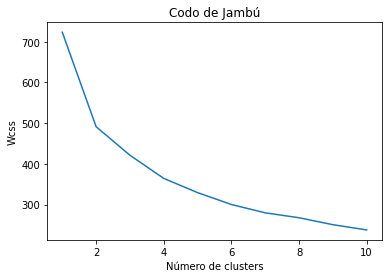

In [9]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de clusters")
plt.ylabel("Wcss")
plt.show()

In [10]:
clustering = KMeans(n_clusters = 2, max_iter = 300)
clustering.fit(data_norm)

KMeans(n_clusters=2)

In [11]:
data['Kmeans_Clusters'] = clustering.labels_
data.head()

,Unnamed: 0,country_code,country_name,year,Median age (years),"Net migration rate (per 1,000 people)",Population with at least some secondary education (% ages 25 and older),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)","Mean years of schooling, female (years)",...,Ratio of education and health expenditure to military expenditure,Current health expenditure (% of GDP),"Age-standarized mortality rate attributed to noncommunicable diseases, female","Age-standarized mortality rate attributed to noncommunicable diseases, male","Carbon dioxide emissions, per capita (tonnes)",Carbon dioxide emissions (kg per 2010 US$ of GDP),"Maternal mortality ratio (deaths per 100,000 live births)",Renewable energy consumption (% of total final energy consumption),Fossil fuel energy consumption (% of total energy consumption),Kmeans_Clusters
0,0,AFG,Afghanistan,1990,15.8,-25.1,8.2,2.3,13.6,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1340.0,15.9,0.0,1
1,1,AFG,Afghanistan,1995,16.0,40.3,9.8,3.5,15.7,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1270.0,35.1,0.0,1
2,2,AFG,Afghanistan,2000,15.5,-8.9,11.1,4.5,17.0,0.8,...,0.0,0.0,857.8,997.8,0.0,0.0,1100.0,54.2,0.0,1
3,3,AFG,Afghanistan,2005,16.0,6.4,14.5,6.3,22.3,1.0,...,0.0,9.9,0.0,0.0,0.0,0.0,821.0,40.9,0.0,1
4,4,AFG,Afghanistan,2010,15.9,-7.6,18.2,5.9,29.8,1.2,...,6.2,8.6,826.1,946.0,0.0,0.0,584.0,14.8,0.0,1


In [36]:
#data.to_csv('dataclustereada.csv')

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(data_norm)
pca_data_df = pd.DataFrame(data = pca_data, columns = ['componente_1','componente_2'])
pca_nombre_datos = pd.concat([pca_data_df, data['Kmeans_Clusters']], axis=1)

pca_nombre_datos


,componente_1,componente_2,Kmeans_Clusters
0,-1.083661,-0.036274,1
1,-1.045653,-0.060547,1
2,-0.868145,-0.017581,1
3,-0.568573,0.136010,1
4,-0.425346,0.194949,1
...,...,...,...
1015,-0.356263,0.045790,1
1016,-0.339531,0.017180,1
1017,-0.283267,0.076768,1
1018,-0.008986,0.682055,1


In [15]:
temp = pd.DataFrame(pca.components_,columns=data_norm.columns,index = ['componente_1','componente_2'])
print(temp)
temp.to_csv('data/pesos.csv')

              Mean years of schooling, female (years)  \
componente_1                                 0.441608   
componente_2                                -0.133137   

              Mean years of schooling, male (years)  \
componente_1                               0.379067   
componente_2                              -0.105069   

              Share of seats in parliament (% held by women)  \
componente_1                                        0.185448   
componente_2                                        0.216424   

              Adolescent birth rate (births per 1,000 women ages 15-19)  \
componente_1                                          -0.298428           
componente_2                                           0.226495           

              Labour force participation rate (% ages 15 and older), female  \
componente_1                                          -0.018432               
componente_2                                           0.263935               

     

In [37]:
#pca_nombre_datos.to_csv('datapca.csv')

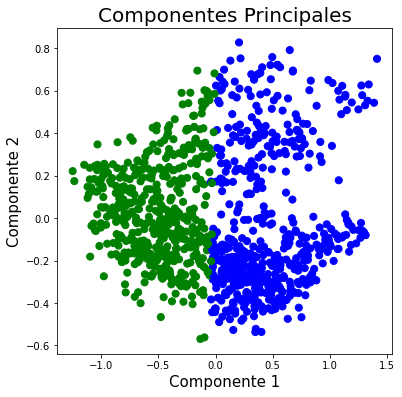

In [34]:
fig = plt.figure(figsize = (6, 6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1',fontsize = 15)
ax.set_ylabel('Componente 2',fontsize = 15)
ax.set_title('Componentes Principales',fontsize = 20)

color_theme = np.array(["blue","green"])
ax.scatter(x=pca_nombre_datos.componente_1, y = pca_nombre_datos.componente_2,
           c=color_theme[pca_nombre_datos.Kmeans_Clusters], s=50)
plt.show()

In [35]:
centroids_V = clustering.cluster_centers_
centroids_V

array([[0.67568844, 0.67152782, 0.27724504, 0.14903982, 0.50057941,
        0.57594017, 0.8160726 , 0.67022269, 0.67486045, 0.20514334,
        0.18459304, 0.0490544 , 0.06060073, 0.59820897, 0.23900143,
        0.24765065],
       [0.21955717, 0.28725074, 0.13438504, 0.44773174, 0.53732811,
        0.66254207, 0.56183921, 0.29224575, 0.34294083, 0.02783096,
        0.03232686, 0.03988642, 0.05252319, 0.5431042 , 0.10669145,
        0.03180167]])

In [ ]:
temp = pd.DataFrame(centroids_V)
#temp.to_csv("centroides.csv")